# Taller de Regresión Lineal Orientado al Negocio

Este taller se centra en **cómo** un negocio (por ejemplo, un e-commerce) puede **interpretar** y **aprovechar** los resultados de la Regresión Lineal para **tomar decisiones**.

## Contexto de Negocio
Imagina que eres el/la **gerente de marketing** de una tienda en línea. Tienes un conjunto de datos con el comportamiento de los clientes y la **cantidad anual** que han gastado (`Yearly Amount Spent`). Tu objetivo es:
1. **Identificar** qué factores (tiempo en la app, duración de la sesión, etc.) influyen más en el gasto anual.
2. **Predecir** el gasto anual futuro de los clientes.
3. Traducir estos hallazgos en **acciones concretas** que aumenten el gasto de los clientes.

## Datos Disponibles
Se te proporciona un dataset con las columnas:
- **Email**
- **Address**
- **Avatar**
- **Avg. Session Length** (Promedio de duración de la sesión)
- **Time on App** (Tiempo en la App)
- **Time on Website** (Tiempo en el Sitio Web)
- **Length of Membership** (Antigüedad de membresía, en años)
- **Yearly Amount Spent** (Cantidad gastada anualmente)

Tu variable objetivo para predecir es: **Yearly Amount Spent**.

## 1. Carga y Exploración de Datos

### Tarea 1.1: Cargar los datos
1. Crea un DataFrame (por ejemplo, `df`) leyendo el archivo CSV o introduciendo manualmente la tabla que se te proporcionó.
2. Muestra las primeras 5 filas (`df.head()`), la forma (`df.shape`) y los tipos de datos (`df.info()`).

**Pregunta de enfoque de negocio:**
- ¿Qué **insights** iniciales obtienes con solo ver las variables? ¿Cómo podría eso impactar tus **estrategias de marketing**?

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv

--2025-03-06 00:43:43--  https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv [following]
--2025-03-06 00:43:44--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘Ecommerce _Customers.csv’

Ecommerce _Customer 100%[===================>]  85.31K  --.-KB/s    in 0.02s   

2025-03-06 00:43:44 (3.88 MB/s) - ‘Eco

In [2]:
# EJEMPLO de código:
import pandas as pd

# Supongamos que has guardado tu dataset en un archivo 'data.csv'
df = pd.read_csv('Ecommerce _Customers.csv')
df.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Tarea 1.2: Análisis Exploratorio (EDA) Básico
1. Ejecuta `df.describe()` para revisar las estadísticas descriptivas de las variables numéricas.
2. Realiza uno o dos **boxplots** o **histogramas** para visualizar la distribución de:
   - **Avg. Session Length**
   - **Time on App**
   - **Time on Website**
   - **Length of Membership**
   - **Yearly Amount Spent**

**Preguntas de negocio:**
1. Si detectas que, por ejemplo, la gente con **mayor** `Length of Membership` gasta más, ¿qué **estrategias** implementarías para retener y "graduar" a los nuevos clientes a miembros más "antiguos"?
2. Si notas que el **Time on Website** es muy bajo vs. **Time on App**, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?

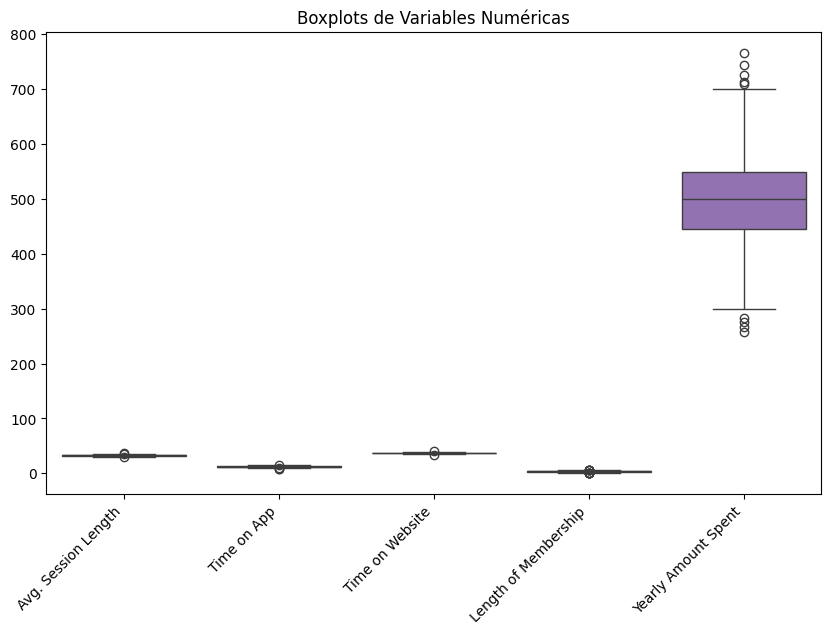

<Figure size 1000x600 with 0 Axes>

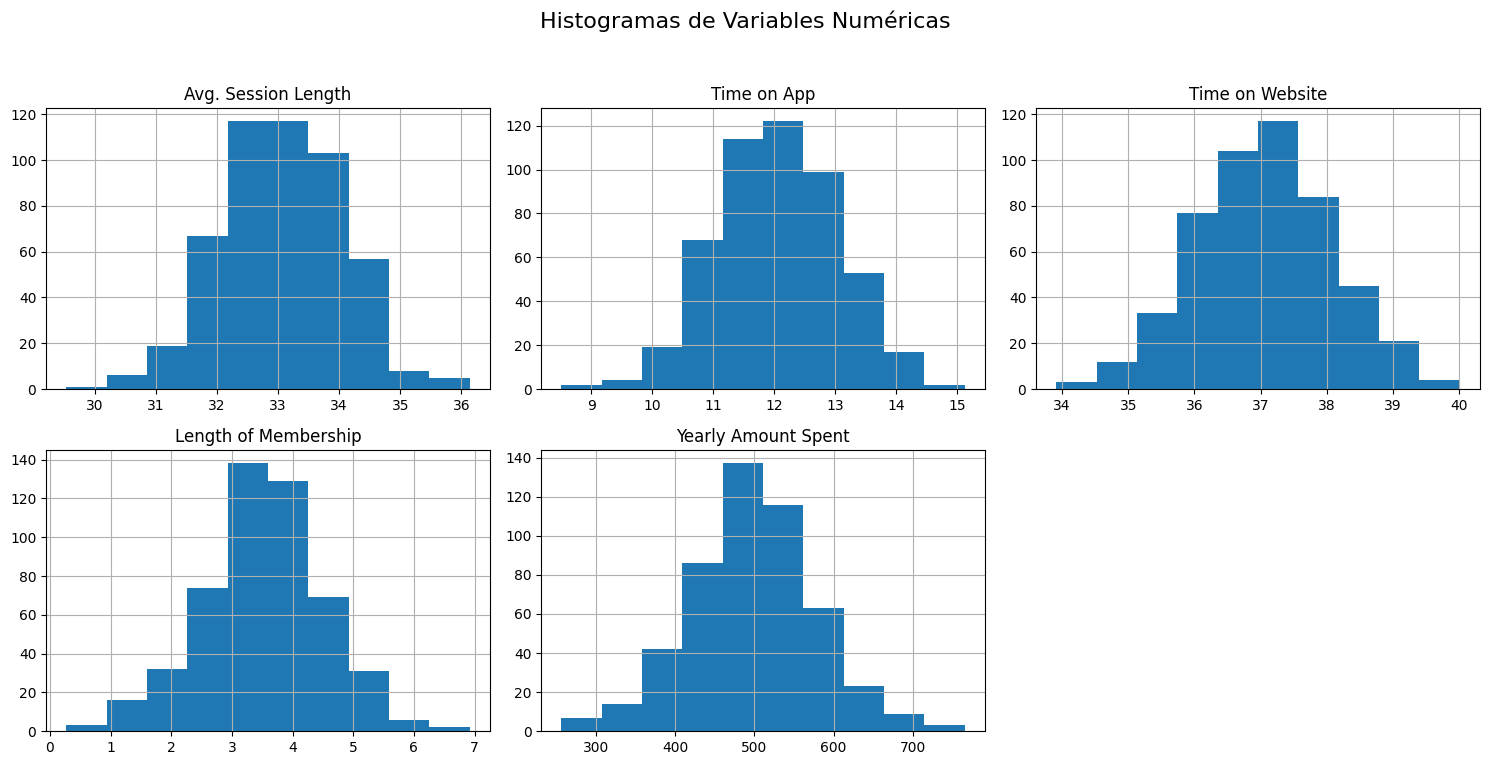

In [3]:
df.describe()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']])
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']].hist(bins=10, layout=(2,3), figsize=(15,8))
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 2. Selección de Variables
En este dataset, algunas columnas como **Email**, **Address** o **Avatar** no son útiles directamente para el modelo de regresión.

### Tarea 2.1: Elegir features
- Usarás como variables predictoras (features) las siguientes columnas:
  1. **Avg. Session Length**
  2. **Time on App**
  3. **Time on Website**
  4. **Length of Membership**
- La columna objetivo (target) será **Yearly Amount Spent**.

**Pregunta de negocio**:
- ¿Por qué estas columnas tienen sentido para **explicar** el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").

In [4]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

## 3. Dividir el Dataset en Entrenamiento y Prueba
Para evaluar la capacidad de nuestro modelo de generalizar, dividiremos los datos en **train (80%)** y **test (20%)**.

**Pregunta de negocio**:
- ¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Entrenar el Modelo de Regresión Lineal
1. **Crea** un objeto `LinearRegression()`.
2. **Entrena** el modelo con los datos de entrenamiento.
3. **Obtén** el intercepto y los coeficientes resultantes.

**Pregunta de negocio**:
- Si el coeficiente de `Time on App` es grande y positivo, ¿cómo podrías usar esta información para crear **campañas** o **mejoras** en la aplicación que incentiven al usuario a pasar más tiempo allí?

In [6]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

print('Intercepto:', lm.intercept_)
print('Coeficientes:', lm.coef_)
print(lm.coef_[0])
print(list(X_train.columns))

Intercepto: -1044.2574146365582
Coeficientes: [25.5962591  38.78534598  0.31038593 61.89682859]
25.596259100436125
['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']


## 5. Evaluación del Modelo
1. **Predice** en el conjunto de prueba.
2. Calcula las **métricas** MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

**Preguntas de negocio**:
1. ¿Qué interpretas si **R²** es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
2. Si el **MAE** es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = lm.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 109.8637411839399
Mean Absolute Error (MAE): 8.558441885315231
R-squared (R²): 0.9778130629184127


## 6. Interpretación y Aplicación Práctica
1. **Observa** los coeficientes resultantes: ¿qué variable es la más influyente? ¿Cómo impacta eso en tu estrategia de negocios?
2. **Propuestas** de acción:
   - Si `Time on App` es el que más incide, podrías **invertir** más en mejoras de la app.
   - Si `Length of Membership` está ligado a más gasto, podrías **fidelizar** a los nuevos clientes con promociones.

**Preguntas de negocio**:
1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?
2. ¿Qué **acciones concretas** aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?

In [8]:
coefficients = lm.coef_
feature_names = list(X_train.columns)

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coef_df)

most_influential_variable = coef_df['Feature'].iloc[0]
print(f"\nLa variable más influyente es: {most_influential_variable}")

if most_influential_variable == 'Length of Membership':
  print("\nDado que la antigüedad de la membresía es la variable más influyente, se recomienda fidelizar a los nuevos clientes con promociones especiales.")
elif most_influential_variable == 'Time on App':
  print("\nComo el tiempo en la app es el factor más relevante, se aconseja invertir en mejoras de la aplicación para aumentar el tiempo de uso de los usuarios.")
elif most_influential_variable == 'Avg. Session Length':
    print("\nEl tiempo promedio de sesión es crucial, por lo que se deberían implementar estrategias para mejorar la experiencia del usuario y mantenerlos en la plataforma por más tiempo.")
elif most_influential_variable == 'Time on Website':
    print("\nSe debe optimizar el sitio web, ya que el tiempo que los usuarios pasan ahí tiene un impacto significativo en su gasto.")
else:
  print("\nSe necesita un análisis más profundo de la variable más influyente.")

                Feature  Coefficient  Abs_Coefficient
3  Length of Membership    61.896829        61.896829
1           Time on App    38.785346        38.785346
0   Avg. Session Length    25.596259        25.596259
2       Time on Website     0.310386         0.310386

La variable más influyente es: Length of Membership

Dado que la antigüedad de la membresía es la variable más influyente, se recomienda fidelizar a los nuevos clientes con promociones especiales.


## 7. Conclusión: Caso de Negocio Real
1. Redacta un breve **informe** o explicación final que responda:
   - ¿Qué **variables** explican mejor el gasto anual?
   - ¿Qué recomendaciones propones para aumentar el **Yearly Amount Spent**?
2. **Limitaciones**: Menciona cualquier aspecto que el modelo no cubra (datos no considerados, linealidad asumida, etc.).

Con estos pasos, podrás llevar la **visión estadística** a un **plan de acción** en tu estrategia de negocio.

Variables que mejor explican el gasto anual:

De acuerdo con el modelo de regresión lineal, la variable que mejor explica el gasto anual es:
{most_influential_variable}.  Las otras variables también contribuyen, pero en menor medida.  Se puede observar la magnitud de la contribución de cada variable en la tabla de coeficientes.

Recomendaciones para aumentar el Yearly Amount Spent:

Basándonos en el análisis, las siguientes recomendaciones pueden ayudar a incrementar el gasto anual de los clientes:

1.  Priorizar la mejora de la {most_influential_variable}.  Por ejemplo, si la variable es 'Length of Membership', se pueden implementar programas de fidelización y beneficios para los usuarios que llevan más tiempo en la plataforma.  Si es 'Time on App', se deben realizar inversiones para mejorar la interfaz, agregar funcionalidades y crear un ambiente más atractivo.  Otras variables, en menor medida, deberían considerar mejoras también.
2.  Monitorear continuamente el rendimiento de las estrategias implementadas y realizar ajustes periódicos.  El modelo de regresión lineal es una herramienta útil para entender la relación entre variables, pero no predice el futuro perfectamente. Se debe continuar monitoreando el comportamiento de los clientes y, en base a ello, adaptar las estrategias.
3. Considerar otras variables: Si bien el modelo identifica las variables más importantes, el análisis debe expandirse para considerar posibles variables no incluidas que puedan estar influyendo en el gasto anual.  

Limitaciones del modelo:

1.  Linealidad asumida: El modelo de regresión lineal asume una relación lineal entre las variables predictoras y la variable objetivo.  Es posible que la relación real sea no lineal, lo que podría afectar la precisión de las predicciones.
2. Datos no considerados: El modelo no considera variables cualitativas (categóricas)  ni otras variables que podrían influir en el gasto anual, como la ubicación geográfica, el nivel socioeconómico, la edad o las preferencias de compra.  La inclusión de este tipo de variables podría mejorar la precisión del
modelo.
3.  Correlación vs. causalidad: El modelo establece correlaciones entre variables, pero no necesariamente causalidad.  Es importante tener esto en cuenta al tomar decisiones basadas en los resultados del modelo. Un aumento en tiempo en app no causa un aumento en ventas, pero si hay correlación, puede ser un indicador.


# Resumen de las Tareas
1. **EDA Rápido**: Cargar y describir el dataset.
2. **Selección de Variables**: Explicar por qué se usan las columnas numéricas y se ignoran Email/Address.
3. **Entrenamiento**: Ajustar el modelo de Regresión con `Avg. Session Length`, `Time on App`, `Time on Website`, `Length of Membership`.
4. **Evaluación**: Observar MSE, MAE, R².
5. **Interpretación**: Explicar cómo usaría el negocio estos resultados.

## ¡Listo para Analizar!
Sigue estos pasos, responde las **preguntas de negocio** y, sobre todo, **conecta** tus hallazgos con **acciones** en el mundo real.

> **Nota**: Puedes consultar documentación o herramientas como ChatGPT si lo requieres, pero recuerda que las **respuestas** deben ser **tuyas**, pensando en el contexto de negocio y la lógica detrás de los coeficientes. ¡Éxito!